# **Assignment – Model Selection.**

## **Do the following on titanic dataset.**

## **1. Load the dataset into python environment.**

In [ ]:
# Importing the necessary libraries for loading and preprocessing the titanic dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading and saving the dataset as titanic_data
titanic_data = pd. read_csv('/content/titanic_dataset .csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# copying the dataset to retain the original titanic dataset
data = titanic_data.copy()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **2. Do all the necessary pre-processing steps.**

In [ ]:
# understanding the dataset

In [ ]:
# displays the column names
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# gives an idea about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# gives count of specific datatypes
data.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [ ]:
# checking for duplicates in the dataset
data.duplicated().sum()

0

In [ ]:
# counts the null values in the columns
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*   So the titanic dataset consists of 891 rows and 12 columns.
*   2 categorical columns and 1 float type columns contain null values.
*   There are 5 int-type, 5 object-type, and 2 float-types of columns.

### Handling null values.

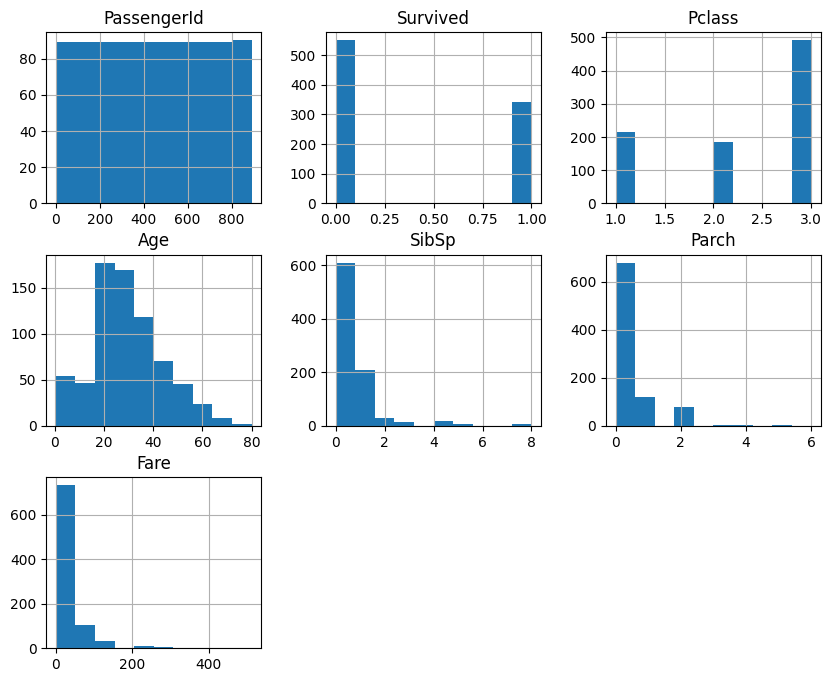

In [ ]:
# to get the distribution of data
freq_graph = data
freq_graph.hist(figsize=(10,8));

In [ ]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

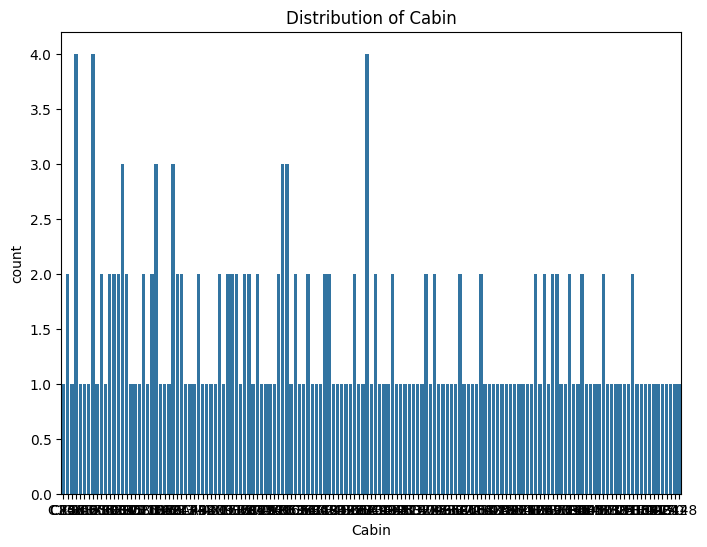

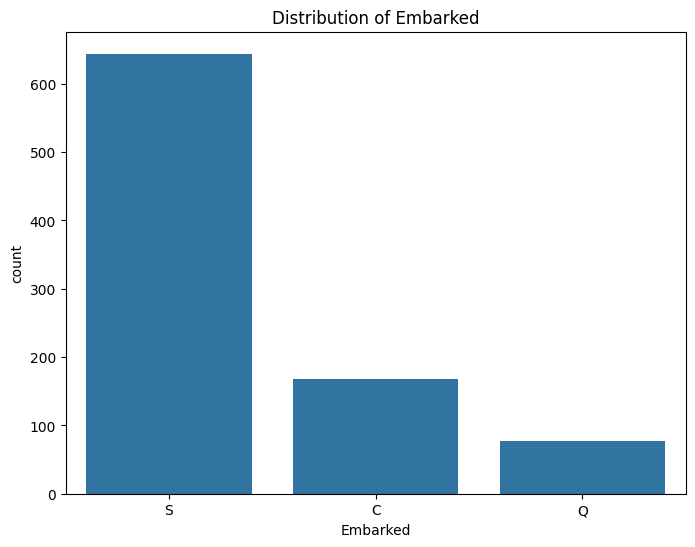

In [ ]:
categorical_null_columns = ['Cabin', 'Embarked']

# Calculating frequency distribution for categorical columns containing null values
for column in categorical_null_columns:
    distribution = data[column].value_counts(normalize=True)  # Calculating relative frequencies
    plt.figure(figsize=(8, 6))
    sns.countplot(data= data, x=column)
    plt.title(f'Distribution of {column}')

In [ ]:
# dropping the passeger id, ticket, and name columns as it doesn't influence our models.
# Also dropping the cabin column as it contains 687 null values.

In [ ]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace = True)

In [ ]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
# Filling the null values
data['Age'].fillna(data['Age'].median(), inplace=True)
data.fillna(data['Embarked'].mode()[0], inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### EDA.

In [ ]:
# gives the statistical description
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


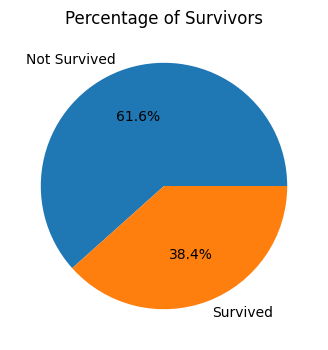

In [ ]:
# To find the survival rate

# Calculating count of survivors and non-survivors
survived_count = data['Survived'].value_counts()
labels = ['Not Survived', 'Survived']

# Creating a pie chart
plt.figure(figsize=(6, 4))
plt.pie(survived_count, labels=labels, autopct='%1.1f%%') #The autopct='%1.1f%%' argument in the plt.pie function formats the percentage values with one decimal place.
plt.title('Percentage of Survivors')
plt.show()

### Only 38% of the total passengers were saved / survived.

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

###  Finding relationship between the independent variables and the dependant variable, 'Survived'.

In [ ]:
p_count= data['Pclass'].value_counts()
p_count

3    491
1    216
2    184
Name: Pclass, dtype: int64

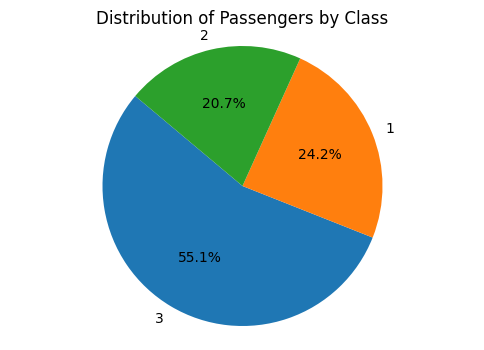

In [ ]:
plt.figure(figsize=(6, 4))
plt.pie(p_count, labels= p_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passengers by Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

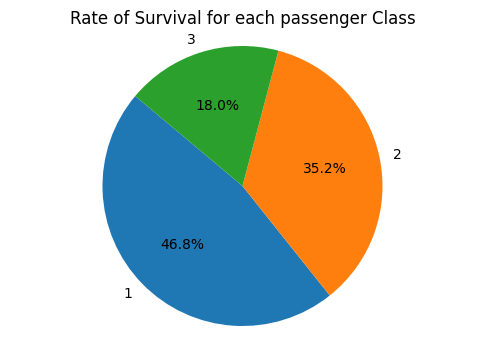

In [ ]:
# Calculating survival rate for each class
pclass_survival_rate = data.groupby('Pclass')['Survived'].mean()

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(pclass_survival_rate, labels=pclass_survival_rate.index, autopct='%1.1f%%', startangle=140)
plt.title('Rate of Survival for each passenger Class')
plt.axis('equal')
plt.show()

### 55% of the people traveled in the 3rd class and only 18% of them were saved. Out of 24% of people in the 1st class and 21% of people in the 2nd class, 47% and 35% survived respectively.

In [ ]:
# The sibsp and parch columns reflect similarities, so combining them as total realtives onboard for each person
data['Total_Relatives'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_Relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


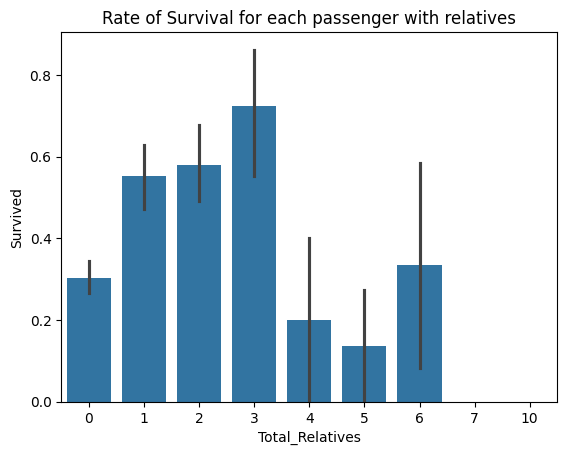

In [ ]:
sns.barplot(x='Total_Relatives', y='Survived', data=data)
plt.title('Rate of Survival for each passenger with relatives')
plt.show()

### People who had aboard the Titanic with 0 to 3 total number of relatives were survived the most than those with 4 or 5 relatives. A high survival rate is also seen for people aboard with 6 relatives.

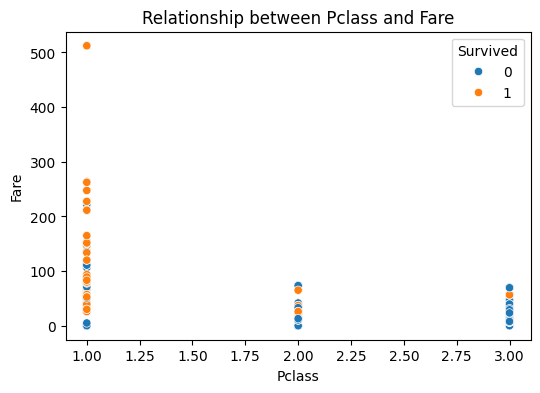

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data= data, x='Pclass', y='Fare', hue='Survived')
plt.title('Relationship between Pclass and Fare')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

### Survival rate is the highest in the 1st class, where people have paid larger fare, whom may have given priority during evacuation, compared to the  2nd and 3rd class passengers.

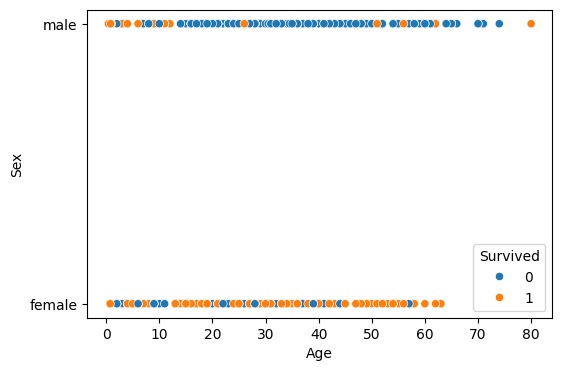

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data= data, x='Age', y= 'Sex', hue='Survived')
plt.legend(title='Survived')
plt.show()

In [ ]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### The age of passengers varied from 4 to 80. While 65 % of the total passengers were males,  female passengers and children were saved/survived the most.


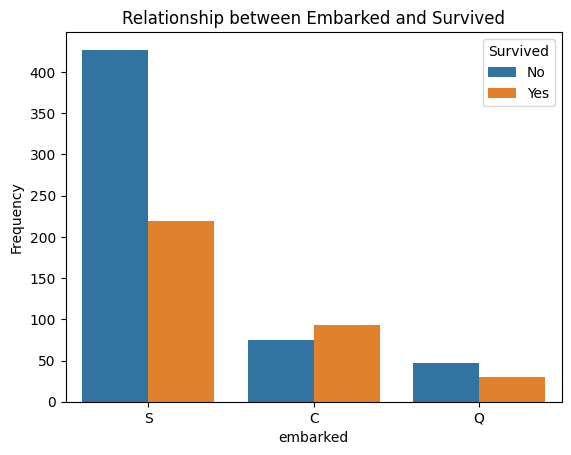

In [ ]:
sns.countplot(x= 'Embarked', hue='Survived', data=data)
plt.title('Relationship between Embarked and Survived')
plt.xlabel('embarked')
plt.ylabel('Frequency')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

###   On account of the total number of people at each port, the survival rate of those embarked from the Cherbourg is the highest. Though the largest group embarked from Southampton, the majority of them were not saved. The same is the case with Queenstown people, the death rate is high compared to the total number of people embarked from there.


<ipython-input-30-c46e4d9634b9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

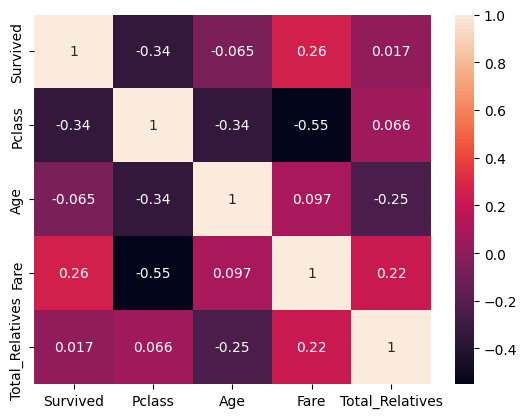

In [ ]:
sns.heatmap(data.corr(),annot = True)

### Outliers Handling.

<Axes: >

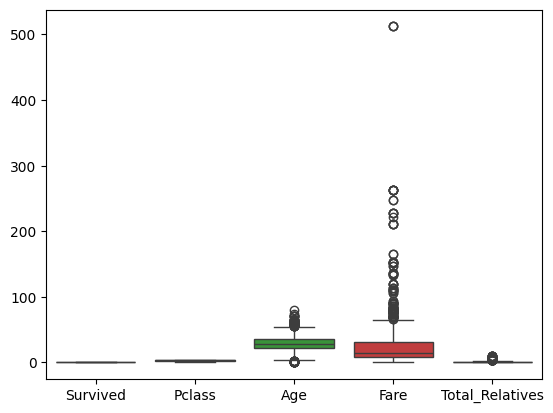

In [ ]:
sns.boxplot(data)

<Axes: >

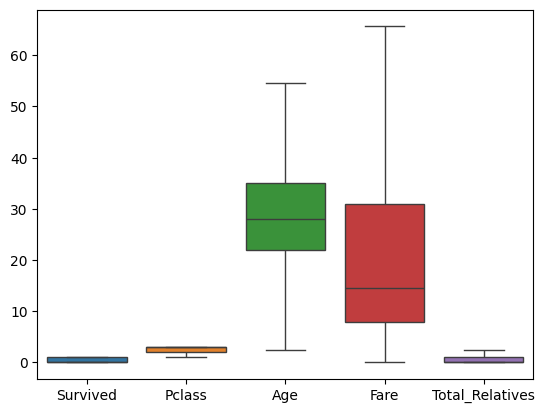

In [ ]:
# clipping outliers to upper and lower limts using the IQR method
def iqr_clip(data, out_col):
    for i in out_col:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 - Q1
        low_lim = Q1 - 1.5 * IQR
        up_lim = Q3 + 1.5 * IQR
        data[i] = data[i].clip(lower=low_lim, upper=up_lim)

    return data  # Ensure to return the modified DataFrame

out_col = ['Age', 'Total_Relatives', 'Fare',]
data = iqr_clip(data, out_col)
sns.boxplot(data)

### Encoding.

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Columns to label encode
en_cols = ['Sex', 'Embarked']

for col in en_cols:
   data[col] = le.fit_transform(data[col])
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_Relatives
0,0,3,1,22.0,7.2500,2,1.0
1,1,1,0,38.0,65.6344,0,1.0
2,1,3,0,26.0,7.9250,2,0.0
3,1,1,0,35.0,53.1000,2,1.0
4,0,3,1,35.0,8.0500,2,0.0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,2,0.0
887,1,1,0,19.0,30.0000,2,0.0
888,0,3,0,28.0,23.4500,2,2.5
889,1,1,1,26.0,30.0000,0,0.0


<Axes: >

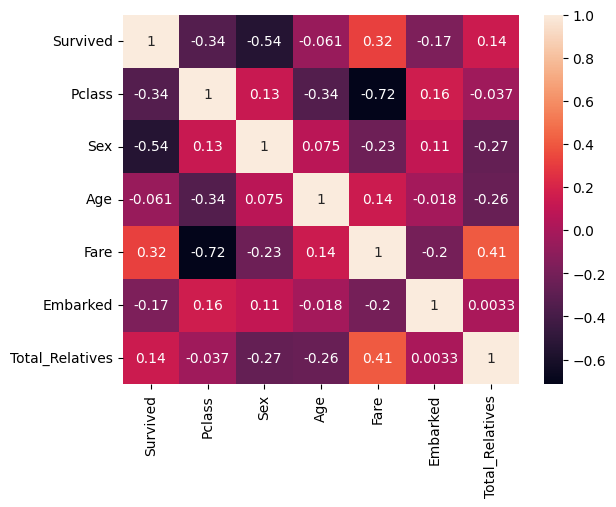

In [ ]:
sns.heatmap(data.corr(),annot = True)

## **Modelling**

In [ ]:
# identifying the target(y) and feature(x) variables
y = data['Survived']
x = data.drop('Survived',axis = 1)

# dividing 25% of data to test and 75% of data to train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = .25)

# classification metric
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score,confusion_matrix

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

## **3. Create kNN and SVM models.**

### **KNN Model.**

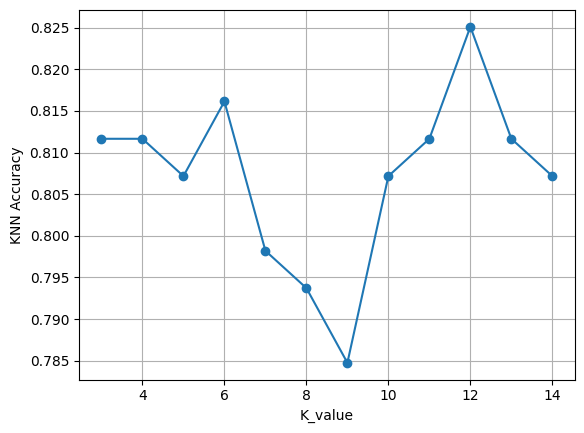

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p = 2)
  knn_model = classifier.fit(x_train_scaled,y_train)
  y_knn_pred =classifier.predict(x_test_scaled)
  accuracy_knn =  accuracy_score(y_test,y_knn_pred)
  metric_k.append(accuracy_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('KNN Accuracy')
plt.grid()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 12 ,metric = 'minkowski',p = 2)
classifier.fit(x_train_scaled,y_train)
y_pred_knn  =classifier.predict(x_test_scaled)
knn_Accuracy = accuracy_score(y_test,y_knn_pred)
knn_Accuracy

0.8071748878923767

In [ ]:
Prec_knn = precision_score(y_test,y_knn_pred, average='weighted')
recall_knn = recall_score(y_test,y_knn_pred, average='weighted')
F1_knn = f1_score(y_test,y_knn_pred, average='weighted')
knn_metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'KNN': [Prec_knn, recall_knn, F1_knn]
})

knn_metrics_df

,Metric,KNN
0,Precision,0.808556
1,Recall,0.807175
2,F1-Score,0.802746


### **SVM Model.**

In [ ]:
#1 linear kernel
from sklearn.svm import SVC
sv_cl_linear= SVC(kernel='linear')
sv_cl_linear.fit(x_train_scaled,y_train)
y_svc_linear_pred = sv_cl_linear.predict(x_test_scaled)
Accuracy_svc_linear = accuracy_score(y_test,y_svc_linear_pred)
Accuracy_svc_linear

0.7847533632286996

In [ ]:
#2 polynomial kernel
from sklearn.svm import SVC
sv_cl_linear= SVC(kernel='poly')
sv_cl_linear.fit(x_train_scaled,y_train)
y_svc_linear_pred = sv_cl_linear.predict(x_test_scaled)
Accuracy_svc_poly = accuracy_score(y_test,y_svc_linear_pred)
Accuracy_svc_poly

0.8026905829596412

In [ ]:
#3 Gaussian (radial basis function) kernel
from sklearn.svm import SVC
sv_cl_rbf = SVC(kernel='rbf')
svm_model = sv_cl_rbf.fit(x_train_scaled,y_train)
y_svc_rbf_pred = sv_cl_rbf.predict(x_test_scaled)
Accuracy_svc_rbf = accuracy_score(y_test,y_svc_rbf_pred)
Accuracy_svc_rbf

0.8116591928251121

### The above code clearly states that the accuracy for the svc model with kernal 'rbf' is greater than the models with kernals 'linear' and 'poly'. Therefore SVM Model with Kernal rbf is taken here.

In [ ]:
Prec_svc_rbf = precision_score(y_test,y_svc_rbf_pred, average='weighted')
recall_svc_rbf = recall_score(y_test,y_svc_rbf_pred, average='weighted')
F1_svc_rbf = f1_score(y_test,y_svc_rbf_pred, average='weighted')

svc_rbf_df = pd.DataFrame( { 'Metric': ['Precision', 'Recall', 'F1-Score'],
    'SVC RBF': [Prec_svc_rbf, recall_svc_rbf, F1_svc_rbf]
})

svc_rbf_df

,Metric,SVC RBF
0,Precision,0.811128
1,Recall,0.811659
2,F1-Score,0.808888


In [ ]:
Accuracy = pd.DataFrame({'Models': ['KNN','SVM_rbf'],'Accuracies':[knn_Accuracy,Accuracy_svc_rbf]})
Accuracy

,Models,Accuracies
0,KNN,0.807175
1,SVM_rbf,0.811659


In [ ]:
Classification_metrics= pd.merge(knn_metrics_df, svc_rbf_df, on='Metric')
Classification_metrics

,Metric,KNN,SVC RBF
0,Precision,0.808556,0.811128
1,Recall,0.807175,0.811659
2,F1-Score,0.802746,0.808888


## **4. Do k-fold and stratified k-fold cross-validation techniques and find the average accuracy score of the models.**

### K-Fold Cross-Validation.

In [ ]:
from sklearn.model_selection import KFold
kfold_validator = KFold(10)
from sklearn.model_selection import cross_val_score
knn_cv_score = cross_val_score(knn_model,x,y,cv =kfold_validator)
svm_cv_score = cross_val_score(svm_model,x,y,cv =kfold_validator)
knn_cv = knn_cv_score.mean()
svm_cv = svm_cv_score.mean()

### Stratified K-Fold Cross-Validation.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)

knn_str_cv_score = cross_val_score(knn_model,x,y,cv = stratified_cv)
svm_str_cv_score = cross_val_score(svm_model,x,y,cv = stratified_cv)

knn_sr_cv = knn_str_cv = knn_cv_score.mean()
svm_sr_cv = svm_str_cv = svm_cv_score.mean()

In [ ]:
cv_scores = pd.DataFrame({'Models':['KNN','SVM_rbf'],'Mean CV Scores':[knn_cv,svm_cv]})
str_cv_scores = pd.DataFrame({'Models':['KNN','SVM_rbf'],'Mean sr_CV Scores':[knn_sr_cv,svm_sr_cv]})
pd.merge(cv_scores,str_cv_scores, on = 'Models')

,Models,Mean CV Scores,Mean sr_CV Scores
0,KNN,0.713908,0.713908
1,SVM_rbf,0.679176,0.679176


In [ ]:
pd.merge(cv_scores, str_cv_scores, on='Models').merge(Accuracy, on='Models')

,Models,Mean CV Scores,Mean sr_CV Scores,Accuracies
0,KNN,0.713908,0.713908,0.807175
1,SVM_rbf,0.679176,0.679176,0.811659


#### Scores we get if clipping is not done to the outliers using iqr method: For KNN: CV scores are 0.704919 and Accuracy is	0.802691. For SVM_rbf:	CV scores are 0.675755 and Acuuracy is	0.820628. When clipping is done, cv scores and accuracies of both the models gets increased.






### **INFERENCE:**
*   **Both models, KNN and SVM with RBF kernel, perform similarly overall.**
*  **SVM_rbf model shows slightly higher accuracy, precision, and F1-score compared to the KNN model, which means the svm_rbf model shows higher performance metrics in this scenario.**
*   **The KNN model has a higher mean CV score compared to the SVM with RBF kernel model which implies the KNN model performs better in terms of generalization.**




